In [1]:
import tensorflow as tf
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

# Warum auch immer, bekomme ich einen fehler wenn ich das hier nicht drinne habe. 
config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
# Tensoren. Multidimensionale Arrays die schnell durch GPU schneller berechnet werden können (je nach lib)
# Tensoren sind unveränderlich
print(tf.add(1, 2))
print(tf.add([1, 2], [3, 4]))
print(tf.square(256))
print(tf.reduce_sum([123, 456, 789]))

tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor([4 6], shape=(2,), dtype=int32)
tf.Tensor(65536, shape=(), dtype=int32)
tf.Tensor(1368, shape=(), dtype=int32)


In [3]:
import numpy as np

ndarray = np.ones([3, 3])

print("TensorFlow operations convert numpy arrays to Tensors automatically")
tensor = tf.multiply(ndarray, 42)
print(tensor)


print("And NumPy operations convert Tensors to numpy arrays automatically")
print(np.add(tensor, 1))

print("The .numpy() method explicitly converts a Tensor to a numpy array")
print(tensor.numpy())

TensorFlow operations convert numpy arrays to Tensors automatically
tf.Tensor(
[[42. 42. 42.]
 [42. 42. 42.]
 [42. 42. 42.]], shape=(3, 3), dtype=float64)
And NumPy operations convert Tensors to numpy arrays automatically
[[43. 43. 43.]
 [43. 43. 43.]
 [43. 43. 43.]]
The .numpy() method explicitly converts a Tensor to a numpy array
[[42. 42. 42.]
 [42. 42. 42.]
 [42. 42. 42.]]


In [4]:
# TensorFlow nutzt wenn möglich eine GPU. Ich hatte in letzterzeit immer Probleme damit, deshalb immer schauen ob die wirklich verwendet wird
x = tf.random.uniform([3, 3])

print("Is there a GPU available: "),
print(tf.config.experimental.list_physical_devices("GPU"))

print("Is the Tensor on GPU #0:  "),
print(x.device.endswith('GPU:0')) # Tensor.device sagt einem immer wo der Tensor gespeichert ist

Is there a GPU available: 
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Is the Tensor on GPU #0:  
True


In [5]:
# Tensorflow bestimmt selbst, welche Quelle am besten geeignet ist. Es ist aber möglich es selbst zu bestimmen mit tf.device:
import time

def time_matmul(x):
    start = time.time()
    for loop in range(100):
        tf.matmul(x, x)

    result = time.time()-start

    print("100 loops: {:0.2f}ms".format(1000*result))

# Force CPU
print("On CPU:")
with tf.device("CPU:0"):
    x = tf.random.uniform([1000, 1000])
    assert x.device.endswith("CPU:0")
    time_matmul(x)

# Force GPU wenn möglich!
if tf.config.experimental.list_physical_devices("GPU"):
    print("On GPU:")
    with tf.device("GPU:0"):
        x = tf.random.uniform([1000, 1000])
        assert x.device.endswith("GPU:0")
        time_matmul(x)

On CPU:
100 loops: 733.91ms
On GPU:
100 loops: 1033.47ms


In [6]:
# Datasets sind ein wesentlicher bestandteil und werden IMMER benötigt. Das richtige einlesen und verwenden ist daher wichtig:

# direkt aus memory einlesen
ds_tensors = tf.data.Dataset.from_tensor_slices([1, 2, 3, 4, 5, 6])

# Erstellen einer CSV Datei die als beispiel Dataset dient. 
import tempfile
_, filename = tempfile.mkstemp()

with open(filename, 'w') as f:
    f.write("""Line 1
        Line 2
        Line 3
        """)

ds_file = tf.data.TextLineDataset(filename)


In [7]:
# Die Tensorflow Datasets erlauben schneller und direktes bearbeiten der Daten...

ds_tensors = ds_tensors.map(tf.square).shuffle(2).batch(2)

ds_file = ds_file.batch(2)

In [8]:
print('Elements of ds_tensors:')
for x in ds_tensors:
    print(x)

print('\nElements in ds_file:')
for x in ds_file:
    print(x)

Elements of ds_tensors:
tf.Tensor([1 4], shape=(2,), dtype=int32)
tf.Tensor([16 25], shape=(2,), dtype=int32)
tf.Tensor([36  9], shape=(2,), dtype=int32)

Elements in ds_file:
tf.Tensor([b'Line 1' b'        Line 2'], shape=(2,), dtype=string)
tf.Tensor([b'        Line 3' b'        '], shape=(2,), dtype=string)


In [9]:
#############################################
### Erstellen von eigenen Layers ###########
############################################


print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [10]:
# TensorFlow hat komplett Keras als package dabei. 
# Bei Keras sind Layers Objecte mit dem ersten parameter als output dimension

layer = tf.keras.layers.Dense(100)

# Die Inputs sind meist unwichtig und können selbst bestimmt werden durch das Modell, können aber auch selbst angegeben werden:
layer = tf.keras.layers.Dense(10, input_shape=(None, 5))


In [11]:
layer(tf.zeros([10, 5]))

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

In [12]:
# Die Daten eines layers sind einfach zugänglich..
layer.variables, layer.kernel, layer.bias

([<tf.Variable 'dense_1/kernel:0' shape=(5, 10) dtype=float32, numpy=
  array([[-0.41182733,  0.3025812 , -0.05049253, -0.57008445,  0.5399417 ,
           0.06194329, -0.35170332,  0.15371823, -0.49343473, -0.19677562],
         [ 0.37893444,  0.5873198 ,  0.26791525, -0.32841545, -0.5642008 ,
          -0.53733337, -0.0244146 ,  0.18100381, -0.6194536 ,  0.2273804 ],
         [-0.0419268 ,  0.62482876,  0.11324614,  0.13922888, -0.6221927 ,
           0.44229192,  0.21030062,  0.6075557 , -0.39254728,  0.2981246 ],
         [-0.05100805, -0.00395417, -0.10811776,  0.09298021,  0.60177535,
          -0.46231696,  0.36368078,  0.53801435, -0.6059572 ,  0.62437564],
         [-0.12662625, -0.29204497, -0.5405418 , -0.35196057,  0.57236105,
           0.6161007 ,  0.48944455, -0.23320943, -0.39716128,  0.3387822 ]],
        dtype=float32)>,
  <tf.Variable 'dense_1/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>],
 <tf.Variable 'den

In [13]:
# Erstellen eines eigenen Layers:
# Erben von der Layer Klasse und die Methoden: __init__, build und call implementieren
class NicoDense(tf.keras.layers.Layer):
    def __init__(self, num_outputs):
        super(NicoDense, self).__init__()
        self.num_outputs = num_outputs
        
    def build(self, input_shape):
        self.kernel = self.add_weight("kernel", shape=[int(input_shape[-1]), self.num_outputs])
        
    def call(self, input):
        return tf.matmul(input, self.kernel)
    
layer = NicoDense(10)

In [14]:
_ = layer(tf.zeros([10, 5]))
print([var.name for var in layer.trainable_variables])

['nico_dense/kernel:0']


In [15]:
# Composing Layers ist das A und O für bessere Modelle, TF bietet mit Keras einfache und gute Möglichkeiten:

class ResnetIdentityBlock(tf.keras.Model):
    def __init__(self, kernel_size, filters):
        super(ResnetIdentityBlock, self).__init__(name='')
        filters1, filters2, filters3 = filters

        self.conv2a = tf.keras.layers.Conv2D(filters1, (1, 1))
        self.bn2a = tf.keras.layers.BatchNormalization()

        self.conv2b = tf.keras.layers.Conv2D(filters2, kernel_size, padding='same')
        self.bn2b = tf.keras.layers.BatchNormalization()

        self.conv2c = tf.keras.layers.Conv2D(filters3, (1, 1))
        self.bn2c = tf.keras.layers.BatchNormalization()

    def call(self, input_tensor, training=False):
        x = self.conv2a(input_tensor)
        x = self.bn2a(x, training=training)
        x = tf.nn.relu(x)

        x = self.conv2b(x)
        x = self.bn2b(x, training=training)
        x = tf.nn.relu(x)

        x = self.conv2c(x)
        x = self.bn2c(x, training=training)

        x += input_tensor
        return tf.nn.relu(x)


block = ResnetIdentityBlock(1, [1, 2, 3])


In [16]:
_ = block(tf.zeros([1, 2, 3, 3]))
block.layers

In [17]:
block.summary()

Model: "resnet_identity_block"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  4         
_________________________________________________________________
batch_normalization (BatchNo multiple                  4         
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  4         
_________________________________________________________________
batch_normalization_1 (Batch multiple                  8         
_________________________________________________________________
conv2d_2 (Conv2D)            multiple                  9         
_________________________________________________________________
batch_normalization_2 (Batch multiple                  12        
Total params: 41
Trainable params: 29
Non-trainable params: 12
________________________________________________

In [18]:
nico_seq = tf.keras.Sequential([tf.keras.layers.Conv2D(1, (1, 1), input_shape=(None, None, 3)),
                            tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.Conv2D(2, 1,
                                                    padding='same'),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.Conv2D(3, (1, 1)),
                             tf.keras.layers.BatchNormalization()])

nico_seq(tf.zeros([1, 2, 3, 3]))

<tf.Tensor: shape=(1, 2, 3, 3), dtype=float32, numpy=
array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype=float32)>

In [19]:
nico_seq.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, None, None, 1)     4         
_________________________________________________________________
batch_normalization_3 (Batch (None, None, None, 1)     4         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, None, None, 2)     4         
_________________________________________________________________
batch_normalization_4 (Batch (None, None, None, 2)     8         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, None, None, 3)     9         
_________________________________________________________________
batch_normalization_5 (Batch (None, None, None, 3)     12        
Total params: 41
Trainable params: 29
Non-trainable params: 12
___________________________________________________________

In [20]:
####################################################
### Building and training of custom models ########
###################################################

In [21]:
import os
import matplotlib.pyplot as plt

In [22]:
print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))

TensorFlow version: 2.3.0
Eager execution: True


In [23]:
# Custom training mit dem Iris Datensatz
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"
train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url), origin=train_dataset_url)

print("Local copy of the dataset file: {}".format(train_dataset_fp))

Local copy of the dataset file: C:\Users\Nico\.keras\datasets\iris_training.csv


In [26]:
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

feature_names = column_names[:-1]
label_name = column_names[-1]

print(f'Features: {feature_names}')
print(f'Label: {label_name}')

Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Label: species


In [27]:
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

In [28]:
batch_size = 32

train_dataset = tf.data.experimental.make_csv_dataset(train_dataset_fp, batch_size, column_names=column_names, label_name=label_name, num_epochs=1)

In [29]:
features, labels = next(iter(train_dataset))

print(features)

OrderedDict([('sepal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([7.6, 6.7, 6.5, 5.6, 6.4, 6.7, 5.3, 4.8, 6.3, 4.5, 7.4, 7.7, 6.3,
       4.8, 6.7, 5.4, 7.2, 5.6, 5.4, 5. , 5.8, 7.2, 7.3, 6.2, 5.7, 5.4,
       6.4, 4.9, 6.1, 6.3, 6.5, 6.4], dtype=float32)>), ('sepal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([3. , 3. , 3.2, 2.9, 3.2, 3.3, 3.7, 3.4, 3.4, 2.3, 2.8, 3.8, 3.3,
       3. , 3.1, 3.7, 3.2, 2.5, 3. , 3. , 2.8, 3. , 2.9, 2.2, 2.8, 3.9,
       3.2, 3. , 2.6, 2.5, 3. , 2.7], dtype=float32)>), ('petal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([6.6, 5.2, 5.1, 3.6, 4.5, 5.7, 1.5, 1.6, 5.6, 1.3, 6.1, 6.7, 6. ,
       1.4, 4.4, 1.5, 6. , 3.9, 4.5, 1.6, 5.1, 5.8, 6.3, 4.5, 4.1, 1.7,
       5.3, 1.4, 5.6, 5. , 5.8, 5.3], dtype=float32)>), ('petal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([2.1, 2.3, 2. , 1.3, 1.5, 2.1, 0.2, 0.2, 2.4, 0.3, 1.9, 2.2, 2.5,
       0.1, 1.4, 0.2, 1.8, 1.1, 1.5, 0.2, 2.4, 1.6, 1.8, 1.5,

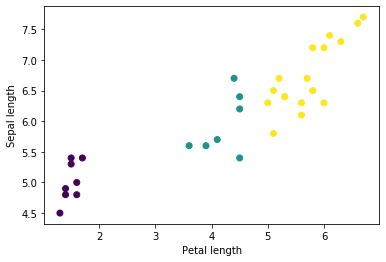

In [30]:
plt.scatter(features['petal_length'], features['sepal_length'], c=labels, cmap='viridis')
plt.xlabel("Petal length")
plt.ylabel("Sepal length")
plt.show()

In [33]:
def pack_features_vector(features, labels):
    features = tf.stack(list(features.values()), axis=1)
    return features, labels

In [34]:
train_dataset = train_dataset.map(pack_features_vector)

features, labels = next(iter(train_dataset))
print(features[:5])

tf.Tensor(
[[4.4 3.2 1.3 0.2]
 [6.3 3.3 6.  2.5]
 [5.5 2.4 3.7 1. ]
 [6.9 3.2 5.7 2.3]
 [7.2 3.6 6.1 2.5]], shape=(5, 4), dtype=float32)


In [35]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4, )),
    tf.keras.layers.Dense(10, activation=tf.nn.relu),
    tf.keras.layers.Dense(3)
])

In [36]:
predictions = model(features)
predictions[:5]

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[0.85316515, 0.4323774 , 0.60176325],
       [1.4969218 , 1.238021  , 0.77138567],
       [1.060293  , 0.69707775, 0.6248638 ],
       [1.54977   , 1.1612577 , 0.8803959 ],
       [1.6542833 , 1.2730712 , 0.9090782 ]], dtype=float32)>

In [38]:
# Wahrscheinlichkeit für jede Klasse
tf.nn.softmax(predictions[:5])

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[0.41080597, 0.2697062 , 0.31948784],
       [0.44326934, 0.34215945, 0.21457116],
       [0.42690825, 0.29688767, 0.27620408],
       [0.45660147, 0.30960542, 0.23379315],
       [0.4634629 , 0.31656045, 0.21997662]], dtype=float32)>

In [39]:
print(f'Prediction: {tf.argmax(predictions, axis=1)}')
print(f'Labels: {labels}')

Prediction: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Labels: [0 2 1 2 2 1 2 1 0 1 0 1 0 2 0 2 0 2 0 2 0 2 0 2 1 2 1 2 1 0 1 0]


In [40]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [41]:
def loss(model, x, y, training):
    y_ = model(x, training=training)
    
    return loss_object(y_true=y, y_pred=y_)

l = loss(model, features, labels, training=False)
print(f"Loss test {l}")

Loss test 1.1848537921905518


In [42]:
def grad(model, inputs, targets):
    with tf.GradientTape() as tape:
        loss_value = loss(model, inputs, targets, training=True)
    return loss_value, tape.gradient(loss_value, model.trainable_variables)

In [43]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [44]:
loss_value, grads = grad(model, features, labels)

print(f"Step: {optimizer.iterations.numpy()}, Initial Loss: {loss_value.numpy()}")

optimizer.apply_gradients(zip(grads, model.trainable_variables))

print(f"Step: {optimizer.iterations.numpy()},     Loss: {loss(model, features, labels, training=True).numpy()}")

Step: 0, Initial Loss: 1.1848537921905518
Step: 1,     Loss: 1.1699604988098145


In [46]:
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
    epoch_loss_avg = tf.keras.metrics.Mean()
    epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

    
    for x, y in train_dataset:
        loss_value, grads = grad(model, x, y)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
        
        epoch_loss_avg.update_state(loss_value)
        epoch_accuracy.update_state(y, model(x, training=True))
        
    train_loss_results.append(epoch_loss_avg.result())
    train_accuracy_results.append(epoch_accuracy.result())
    
    if epoch % 50 == 0:
        print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch, epoch_loss_avg.result(), epoch_accuracy.result()))

Epoch 000: Loss: 1.128, Accuracy: 28.333%
Epoch 050: Loss: 0.793, Accuracy: 70.000%
Epoch 100: Loss: 0.412, Accuracy: 91.667%
Epoch 150: Loss: 0.276, Accuracy: 98.333%
Epoch 200: Loss: 0.185, Accuracy: 97.500%


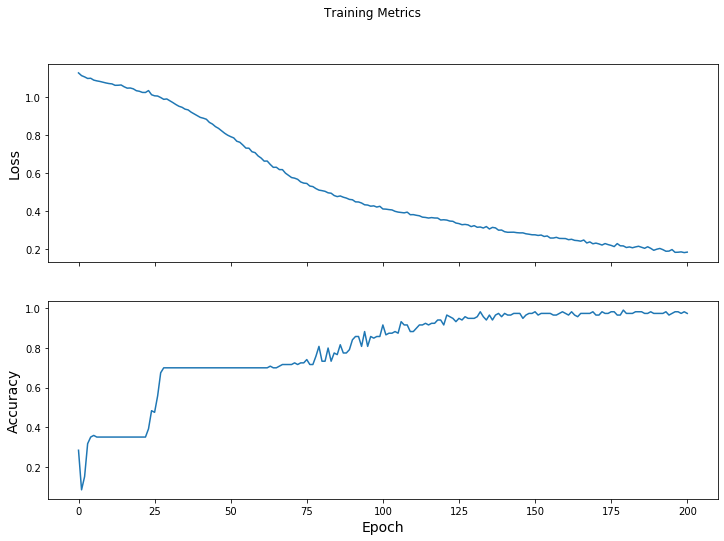

In [47]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

In [48]:
test_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv"
test_fp = tf.keras.utils.get_file(fname=os.path.basename(test_url), origin=test_url)

In [49]:
test_dataset = tf.data.experimental.make_csv_dataset(test_fp, batch_size, column_names=column_names, label_name='species', num_epochs=1, shuffle=False)

test_dataset = test_dataset.map(pack_features_vector)

In [51]:
test_accuracy = tf.keras.metrics.Accuracy()

for (x, y) in test_dataset:
    logits = model(x, training=False)
    prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
    test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

Test set accuracy: 96.667%


In [52]:
# Letzten batch anschauen
tf.stack([y,prediction],axis=1)

<tf.Tensor: shape=(30, 2), dtype=int32, numpy=
array([[1, 1],
       [2, 2],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [2, 2],
       [1, 1],
       [2, 2],
       [2, 2],
       [0, 0],
       [2, 2],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [2, 2],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 2],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 1]])>

In [54]:
predict_dataset = tf.convert_to_tensor([
    [5.1, 3.3, 1.7, 0.5,],
    [5.9, 3.0, 4.2, 1.5,],
    [6.9, 3.1, 5.4, 2.1]
])

predictions = model(predict_dataset, training=False)

for i, logits in enumerate(predictions):
    class_idx = tf.argmax(logits).numpy()
    p = tf.nn.softmax(logits)[class_idx]
    name = class_names[class_idx]
    print("Example {} prediction: {} ({:4.1f}%)".format(i, name, 100*p))

Example 0 prediction: Iris setosa (96.0%)
Example 1 prediction: Iris versicolor (81.5%)
Example 2 prediction: Iris virginica (72.5%)


In [26]:
session.close()